In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####Importing the Data


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PROJECTS DATABASE/Consumer creditworthiness train data.csv")

### Data Quality Check

In [ ]:
df.shape

(521, 13)

In [ ]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y
5,922093,Male,Yes,2,Graduate,Yes,1218825,944100.0,534000,360.0,1.0,Urban,Y
6,804795,Male,Yes,0,Not Graduate,No,524925,341100.0,190000,360.0,1.0,Urban,Y
7,538051,Male,Yes,3+,Graduate,No,683100,563400.0,316000,360.0,0.0,Semiurban,N
8,617715,Male,Yes,2,Graduate,No,901350,343350.0,336000,360.0,1.0,Urban,Y
9,696993,Male,Yes,1,Graduate,No,2889225,2467800.0,698000,360.0,1.0,Semiurban,N


In [ ]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
511,470614,Male,Yes,1,Graduate,No,1364625,450900.0,500000,360.0,1.0,Semiurban,Y
512,254504,Male,Yes,2,Graduate,No,738675,457875.0,296000,360.0,1.0,Urban,Y
513,406888,Male,Yes,0,Graduate,No,479250,1499850.0,140000,180.0,1.0,Semiurban,N
514,279044,Male,No,0,Graduate,No,1308375,824850.0,622000,360.0,1.0,Rural,N
515,821863,Male,Yes,3+,Graduate,No,779850,771300.0,300000,360.0,1.0,Rural,Y
516,947032,Female,Yes,2,Graduate,No,456975,367200.0,226000,480.0,1.0,Semiurban,Y
517,756833,Male,Yes,NaN,Not Graduate,No,691650,405000.0,246000,360.0,0.0,Semiurban,N
518,395763,Male,No,0,Graduate,No,1053675,430875.0,370000,360.0,1.0,Semiurban,N
519,158946,Female,No,0,Not Graduate,No,765000,0.0,190000,360.0,1.0,Rural,N
520,552637,Male,Yes,2,Not Graduate,No,493200,391950.0,90000,360.0,1.0,Semiurban,Y


### Data Pre-Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


In [ ]:
df = df.drop('Loan_ID',axis=1,inplace=False)
#Loan_ID is a identification feature so it is not required for analysis

### Missing Value Treatment

In [ ]:
#Checking the count of null values present in the dataframe feature wise
null_values = df.isnull().sum()
total_rows = df.shape[0]
Percentage_Null = (null_values / total_rows) * 100
summary_df = pd.DataFrame({
    'Feature': null_values.index,
    'Null_Count': null_values.values,
    'Percentage_Null': Percentage_Null.values
})
print(summary_df)

              Feature  Null_Count  Percentage_Null
0              Gender          10         1.919386
1             Married           3         0.575816
2          Dependents          13         2.495202
3           Education           0         0.000000
4       Self_Employed          27         5.182342
5     ApplicantIncome           0         0.000000
6   CoapplicantIncome           0         0.000000
7          LoanAmount           0         0.000000
8    Loan_Amount_Term          14         2.687140
9      Credit_History          43         8.253359
10      Property_Area           0         0.000000
11        Loan_Status           0         0.000000


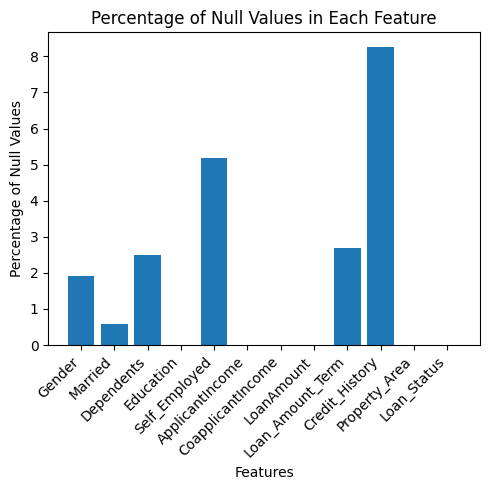

In [ ]:
#Displaying percentage of null values present in the features to get an idea about strategy for missing value treatment
plt.figure(figsize=(5,5))
plt.bar(summary_df['Feature'], summary_df['Percentage_Null'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Null Values')
plt.xlabel('Features')
plt.title('Percentage of Null Values in Each Feature')
plt.tight_layout()
plt.show()


#### Gender

Male      415
Female     96
NaN        10
Name: Gender, dtype: int64


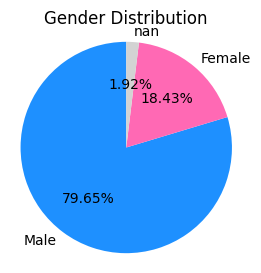

In [ ]:
# Count the occurrences of each gender category and null values
gender_counts = df['Gender'].value_counts(dropna=False)
print(gender_counts)

# Define custom colors for the pie chart slices
custom_colors = ['dodgerblue', 'hotpink', 'lightgray']

# Create a pie chart with custom colors
plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: f'{pct:.2f}%', startangle=90, colors=custom_colors)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()



__Observation__ It has less than 2% of missing data, so we can remove the rows containing the missing values.

In [ ]:
#Removing the rows with null values in Gender column
df.dropna(subset=['Gender'],inplace=True)

#### Marital Status



In [ ]:
#Calculating percentage of null values in the married column
print("Percentage of missing values in Married column is:",df['Married'].isnull().sum()/521 * 100)

Percentage of missing values in Married column is: 0.5758157389635317


__Observation__ It has <1% of missing values, so we can also remove the rows containing the missing values.

In [ ]:
#Removing the rows with null values in Married column
df.dropna(subset=['Married'],inplace=True)

#### Dependents

In [ ]:
#There are some NaN values alongside blank cells, so treat both empty and NaN values as missing (NaN)
df['Dependents'] = df['Dependents'].replace('', pd.NA)

In [ ]:
# More than 2% of data has missing values, so removing the data will cause loss of a lot of information. Instead, we will be using Mode value imputation method for the categorical variable "Dependents"
# Fill missing values in 'Dependents' column with mode value
mode_dependents = df['Dependents'].mode().iloc[0]
df['Dependents'].fillna(mode_dependents, inplace=True)


#### Self Employed

In [ ]:
# Around 5% of data have missing values, so using missing value imputation.
# Fill missing (NaN) values in 'Self_Employed' column with the mode value
mode_self_employed = df['Self_Employed'].mode().iloc[0]
df['Self_Employed'].fillna(mode_self_employed, inplace=True)

#### Credit History

__From the data analytics we got a understanding that the "missing values under Credit history" have nearly same effect on the target variable as when the credit history is '1'.__
>__It may be due to the fact that majority of such candidates would be new customers as such they do not have credit history.__

In [ ]:
# Also the mode(most frequent value) in the column is '1'. So, we will impute the missing values with '1'.
df['Credit_History'].fillna(1, inplace=True)

####Numerical features

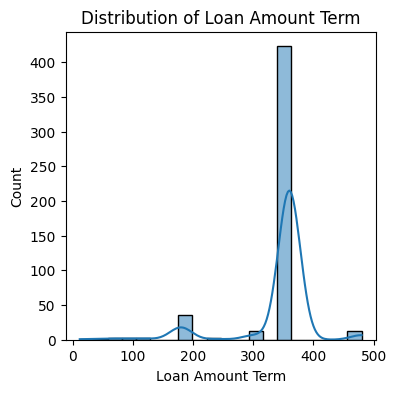

In [ ]:
#Checking the distribution of loan amount to get an idea about the spread and most likelihood estimation
plt.figure(figsize=(4,4))
sns.histplot(df['Loan_Amount_Term'], bins=20, kde=True)
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount Term')
plt.show()


In [ ]:
# Median imputation for missing values in Loan_Amount_term as data has some skewness
median_Loan_Amount_Term = df['Loan_Amount_Term'].median().round(0)
print(median_Loan_Amount_Term)

df['Loan_Amount_Term'].fillna(median_Loan_Amount_Term, inplace=True)

360.0


In [ ]:
#Revisiting the fundamental data summary to verify uniform data completion following the missing value treatment.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 520
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             508 non-null    object 
 1   Married            508 non-null    object 
 2   Dependents         508 non-null    object 
 3   Education          508 non-null    object 
 4   Self_Employed      508 non-null    object 
 5   ApplicantIncome    508 non-null    int64  
 6   CoapplicantIncome  508 non-null    float64
 7   LoanAmount         508 non-null    int64  
 8   Loan_Amount_Term   508 non-null    float64
 9   Credit_History     508 non-null    float64
 10  Property_Area      508 non-null    object 
 11  Loan_Status        508 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 51.6+ KB


### Performing EDA

In [ ]:
#Checking all the numerical features spread of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,5.080000e+02,5.080000e+02,5.080000e+02,508.000000,508.000000
mean,1.200736e+06,3.507515e+05,2.769921e+05,343.771654,0.860236
std,1.372783e+06,4.848896e+05,1.642032e+05,62.660374,0.347084
min,3.375000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000
25%,6.470438e+05,0.000000e+00,1.940000e+05,360.000000,1.000000
50%,8.580375e+05,2.812500e+05,2.480000e+05,360.000000,1.000000
75%,1.285312e+06,5.244188e+05,3.200000e+05,360.000000,1.000000
max,1.822500e+07,4.500000e+06,1.300000e+06,480.000000,1.000000


#### Checking distribution of Categorical Features

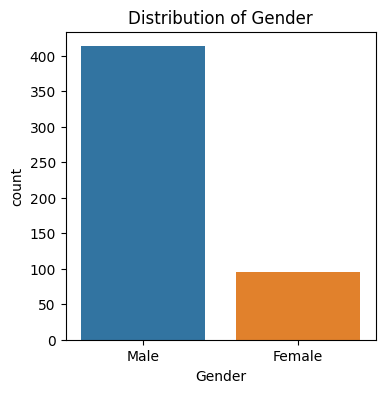

In [ ]:
# Bar plot for a categorical column
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.title(f'Distribution of Gender')
plt.show()

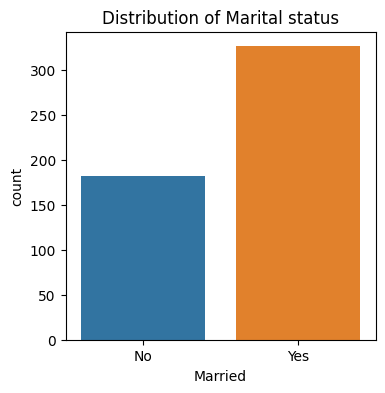

In [ ]:
# Bar plot for a categorical column
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x='Married', data=df)
plt.title(f'Distribution of Marital status')
plt.show()

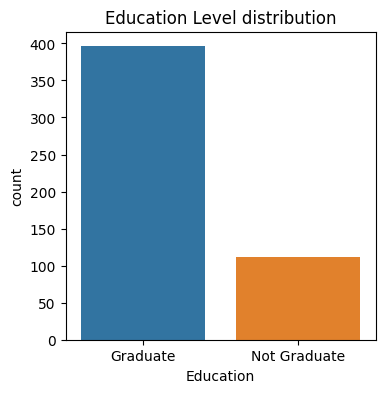

In [ ]:
# Bar plot for a categorical column
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x='Education', data=df)
plt.title(f'Education Level distribution')
plt.show()

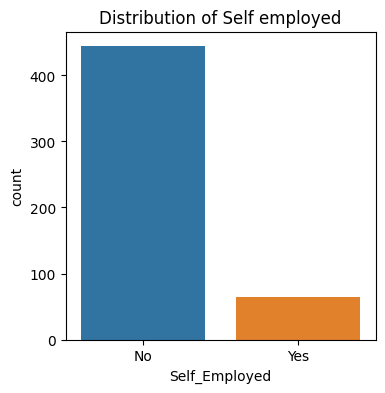

In [ ]:
# Bar plot for a categorical column
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x='Self_Employed', data=df)
plt.title(f'Distribution of Self employed')
plt.show()

#### Impact of categorical features on Loan Approval rates

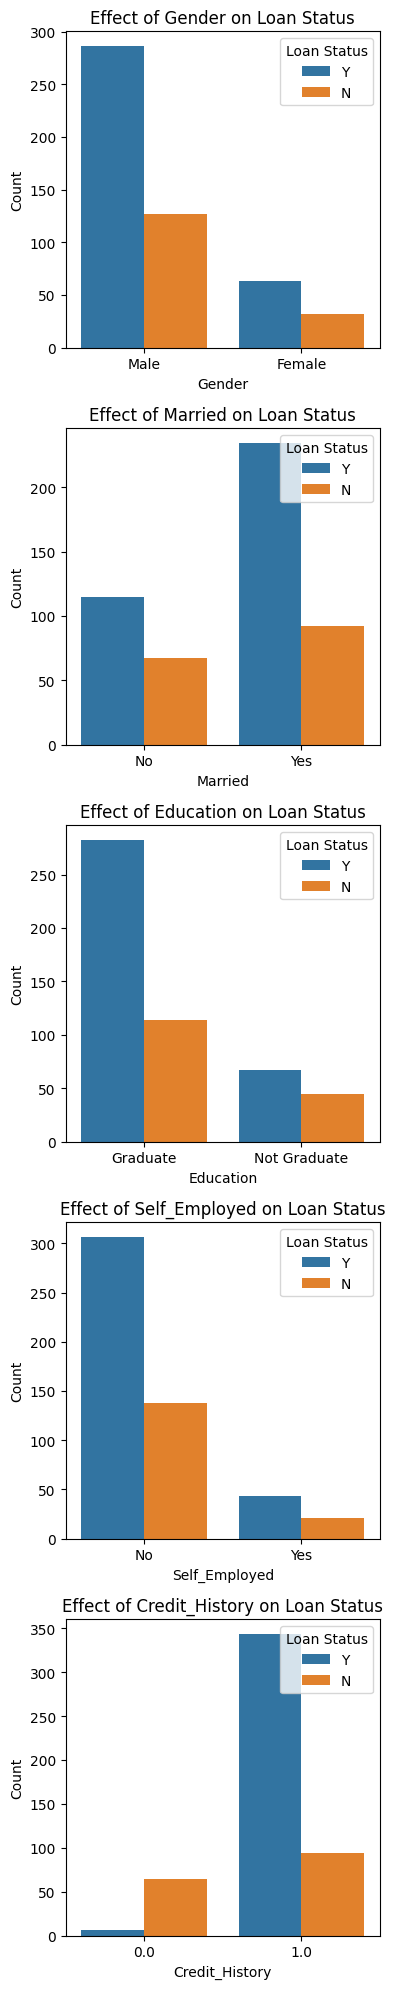

In [ ]:
# Assuming 'cat_features' is a list containing the names of all categorical features in the DataFrame
cat_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

# Set up the subplot layout
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(4, len(cat_features)*4))

# Create bar plots for each categorical feature
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='Loan_Status', data=df, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Effect of {feature} on Loan Status')
    axes[i].legend(title='Loan Status', loc='upper right')

plt.tight_layout()
plt.show()


__Property Area:__

Loan_Status     N    Y  Approval_Rate
Property_Area                        
Rural          58   86      59.722222
Semiurban      41  151      78.645833
Urban          60  112      65.116279


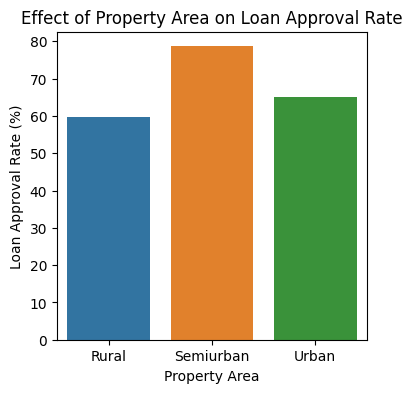

In [ ]:
crosstab_data = pd.crosstab(df['Property_Area'], df['Loan_Status'])
crosstab_data['Approval_Rate'] = crosstab_data['Y'] / (crosstab_data['Y'] + crosstab_data['N']) * 100
print(crosstab_data)

plt.figure(figsize=(4,4))
sns.barplot(x=crosstab_data.index, y=crosstab_data['Approval_Rate'])
plt.xlabel('Property Area')
plt.ylabel('Loan Approval Rate (%)')
plt.title('Effect of Property Area on Loan Approval Rate')
plt.show()

__Observation:__ Clearly, the property area belonging to semi-urban and urban areas prove to be much valuable for the loan approval rates.

__Summarising the observations from the Data__
1. Gender - it does not largely impact the loan approval rate. -- *Low business impact*
2. Married - Not very largely, but married persons have better loan approval rates. --*Medium Business impact*
3. Education -
4. Self_Employed
5. Credit_History - The Credit history is a significant factor for loan approvals, the consumers with good credit history are more likely to get their loans approved.



### Impact of Numerical Features on the target variable

##### Applicant Income and Coapplicant Income

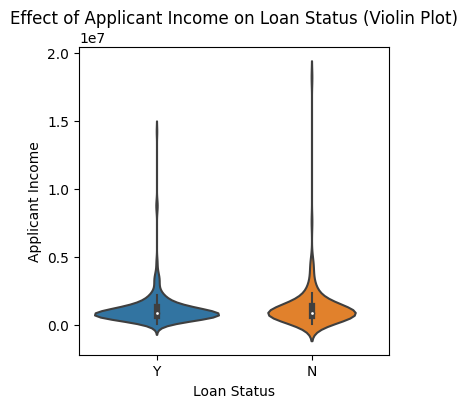

In [ ]:
# Violin Plot
plt.figure(figsize=(4,4))
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Effect of Applicant Income on Loan Status (Violin Plot)')
plt.show()

__Observation:__
The Applicant Income on its own is not clearly showing impact on the loan approval rates. We will be checking for combination of it with other factors.

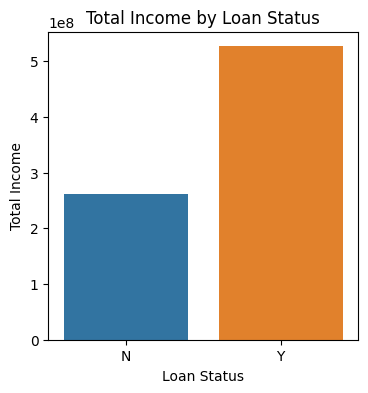

In [ ]:
# Calculate the total income (applicant income + coapplicant income)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Group the data by 'Loan_Status' and sum the 'TotalIncome'
grouped_data = df.groupby('Loan_Status')['TotalIncome'].sum().reset_index()

# Create the countplot
plt.figure(figsize=(4,4))
sns.barplot(x='Loan_Status', y='TotalIncome', data=grouped_data)
plt.xlabel('Loan Status')
plt.ylabel('Total Income')
plt.title('Total Income by Loan Status')
plt.show()

__Observation:__
The applicant income and co-applicant income in combination clearly proves to be a significant factor in loan approval rates.

##### Loan Terms

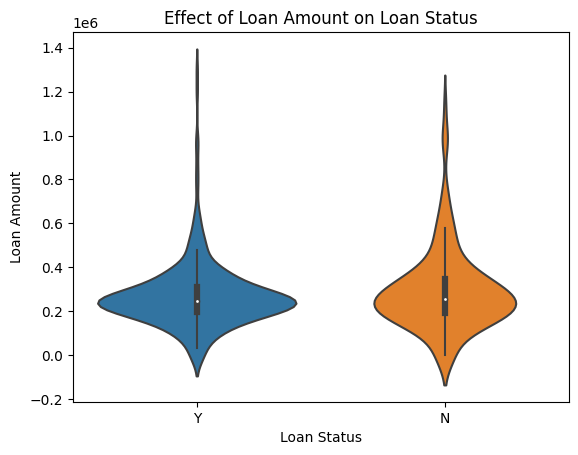

In [ ]:
sns.violinplot(x='Loan_Status', y='LoanAmount', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Effect of Loan Amount on Loan Status')
plt.show()


__Observation:__
The loan amounts which are very high in number are more likely to be rejected. The loan approval rates is higher for reasonable amounts.

In [ ]:
# Calculate the total number of loans for each loan amount term
loan_amount_term_counts = df['Loan_Amount_Term'].value_counts()

# Calculate the number of approved loans for each loan amount term
approved_loan_counts = df[df['Loan_Status'] == 'Y']['Loan_Amount_Term'].value_counts()

# Calculate the approval rate for each loan amount term
approval_rate = (approved_loan_counts / loan_amount_term_counts) * 100

# Create a new DataFrame to hold the loan amount term and approval rate information
approval_data = pd.DataFrame({'Loan_Amount_Term': approval_rate.index, 'Approval_Rate': approval_rate.values})


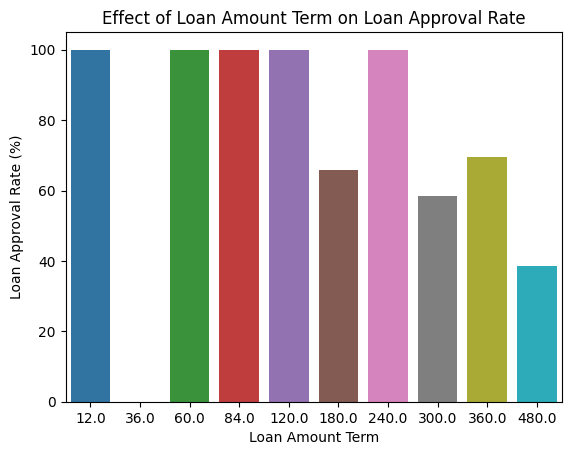

In [ ]:
sns.barplot(x='Loan_Amount_Term', y='Approval_Rate', data=approval_data)
plt.xlabel('Loan Amount Term')
plt.ylabel('Loan Approval Rate (%)')
plt.title('Effect of Loan Amount Term on Loan Approval Rate')
plt.show()


__Observation:__
The loan amount terms for longer intervals also negatively impacts the loan approval rates. The loan amount terms for relatively short intervals have very high probabilities of approval.

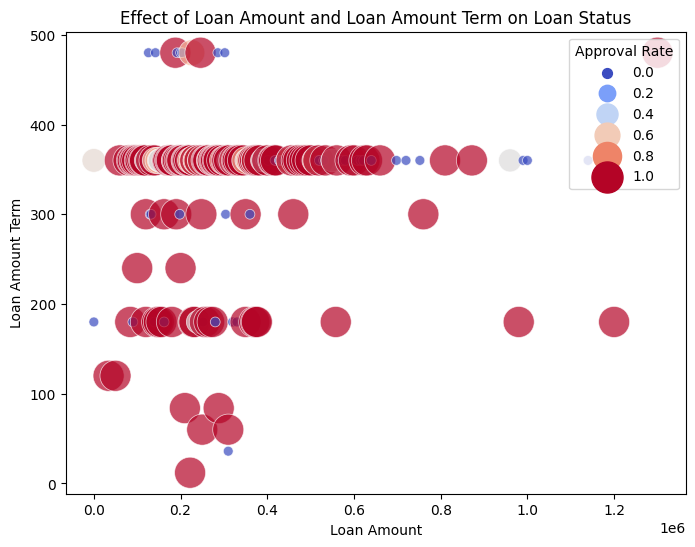

In [ ]:
# Calculate the approval rate for each combination of loan amount and loan amount term
approval_data = df.groupby(['LoanAmount', 'Loan_Amount_Term'])['Loan_Status'].apply(lambda x: (x == 'Y').mean()).reset_index()
approval_data.rename(columns={'Loan_Status': 'Approval_Rate'}, inplace=True)

# Create the bubble chart with different bubble colors based on approval rates
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', size='Approval_Rate', hue='Approval_Rate', data=approval_data, sizes=(50, 500), alpha=0.7, palette='coolwarm')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Amount Term')
plt.title('Effect of Loan Amount and Loan Amount Term on Loan Status')
plt.legend(title='Approval Rate', loc='upper right')
plt.show()


### Multi-variate analysis

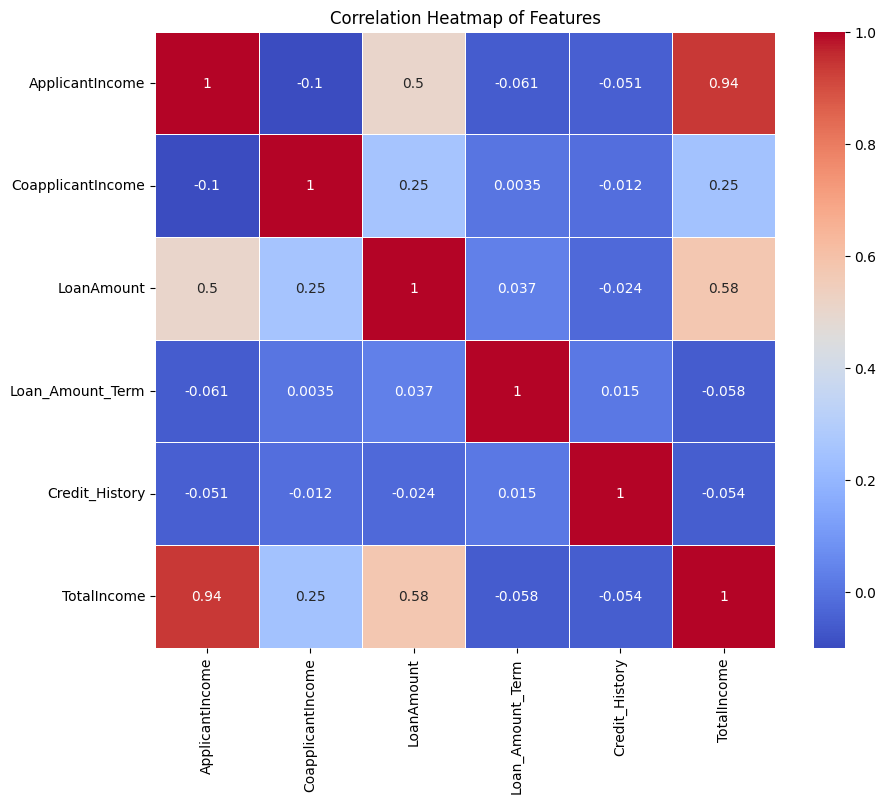

In [ ]:
# select only numeric columns for the heatmap
numeric_columns = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


__Observation__
 * As Total Income is a derived feature from applicant income and co applicant income so we these are highly correlated.
 * we will be keeping the "Total Income" feature as it has more influence on target variable and so dropping applicant income and co-applicant income.

In [ ]:
df.drop('ApplicantIncome',axis=1, inplace=True)
df.drop('CoapplicantIncome',axis=1, inplace=True)

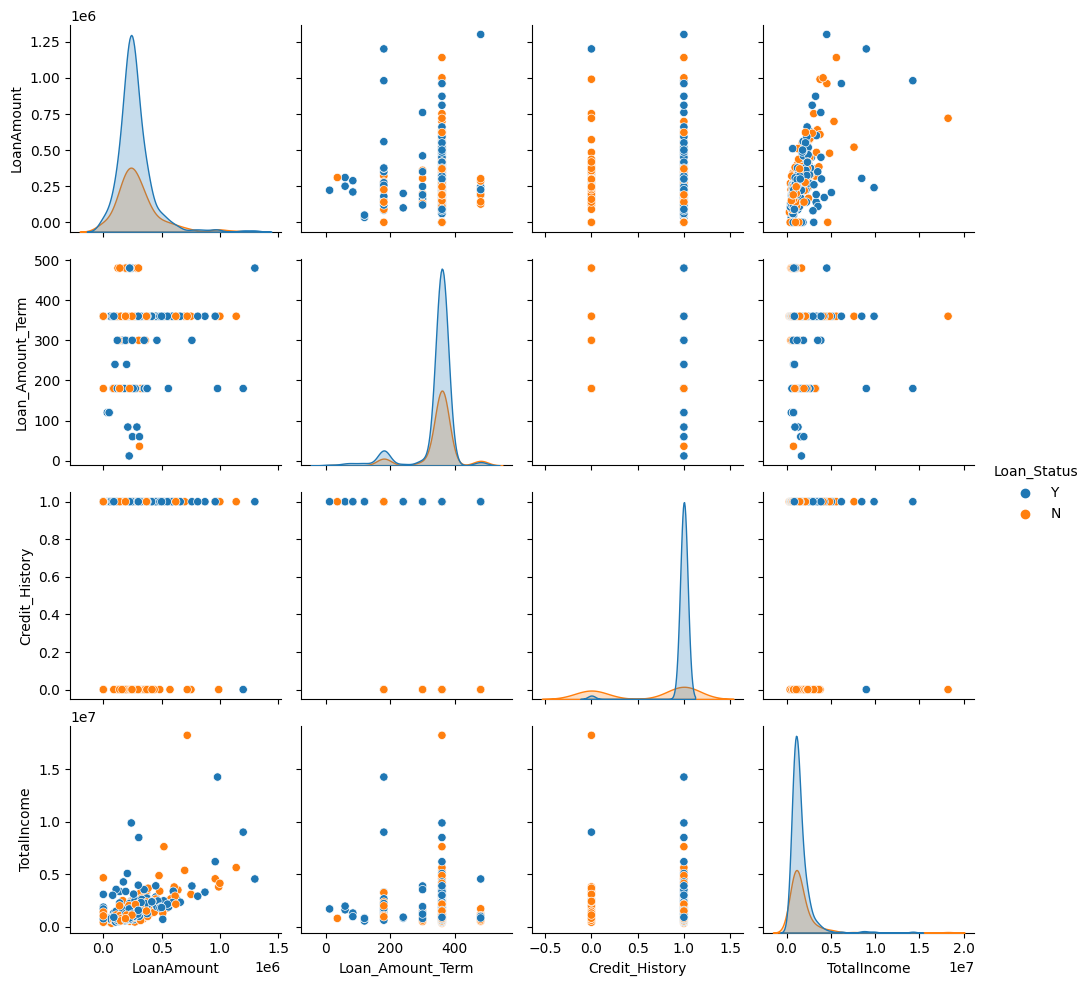

In [ ]:
sns.pairplot(df,hue='Loan_Status')




### Feature Engineering

In [ ]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount            int64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
TotalIncome         float64
dtype: object

__Feature Transformation__

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')
df['Credit_History'] = df['Credit_History'].astype('int')

__Feature Creation__
*Debt to Credit Ratio*

In [ ]:
# Creating new feature "Debt to Credit ratio" by taking ratio of loan amount to total income, as it can be an important factor for loan approval according to the business understanding
# Also we will be checking importance of each features via feature selection technique to improve our modelling
df['Debt_to_Credit_ratio'] = (df['LoanAmount']/df['TotalIncome']).round(2)


In [ ]:
#Separating target and features variable
y = df.pop('Loan_Status')
x = df

In [ ]:
# Step 1: Separate the numerical and categorical columns
numerical_cols = x.select_dtypes(include='number')
categorical_cols = x.select_dtypes(include='object')

# Step 2: One-hot encode the categorical column
one_hot_encoded = pd.get_dummies(categorical_cols, drop_first=True)

# Step 3: Combine the one-hot encoded DataFrame with the original numerical columns
result_df = pd.concat([numerical_cols, one_hot_encoded], axis=1)

x = result_df

#### Variance Inflation Factor (VIF) - Multicollinearity Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
independent_variables = x
independent_variables_with_const = add_constant(independent_variables) #Adding a constant C to the dataframe, necessary for VIF
vif = pd.DataFrame()
vif['Variable'] = independent_variables_with_const.columns
vif['VIF'] = [variance_inflation_factor(independent_variables_with_const.values, i) for i in range(independent_variables_with_const.shape[1])]

In [ ]:
vif

,Variable,VIF
0,const,62.062574
1,LoanAmount,2.480128
2,Loan_Amount_Term,1.068354
3,Credit_History,1.028752
4,TotalIncome,2.510415
5,Debt_to_Credit_ratio,1.892652
6,Gender_Male,1.236577
7,Married_Yes,1.332205
8,Dependents_1,1.152979
9,Dependents_2,1.195547


In [ ]:
numerical_cols.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0,0.95,0.99]).T

,count,mean,std,min,0%,5%,10%,25%,50%,75%,90%,95%,99%,max
LoanAmount,508.0,2.769921e+05,1.642032e+05,0.0,0.0,88700.00,132000.0,194000.00,248000.00,320000.00,450000.00,559300.00,9.786000e+05,1300000.00
Loan_Amount_Term,508.0,3.437717e+02,6.266037e+01,12.0,12.0,180.00,300.0,360.00,360.00,360.00,360.00,360.00,4.800000e+02,480.00
Credit_History,508.0,8.602362e-01,3.470836e-01,0.0,0.0,0.00,0.0,1.00,1.00,1.00,1.00,1.00,1.000000e+00,1.00
TotalIncome,508.0,1.551488e+06,1.409310e+06,324450.0,324450.0,636255.00,724477.5,937012.50,1199812.50,1695712.50,2525670.00,3374921.25,7.515401e+06,18225000.00
Debt_to_Credit_ratio,508.0,2.031890e-01,8.153645e-02,0.0,0.0,0.06,0.1,0.16,0.21,0.25,0.28,0.30,4.372000e-01,0.74


##### Distribution of Income features as those are having high variance

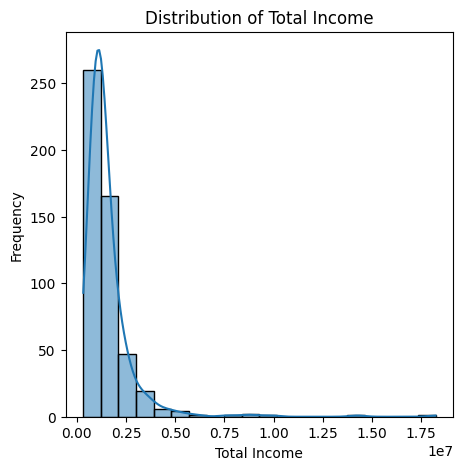

In [ ]:
# Plot histogram for TotalIncome
plt.figure(figsize=(5,5))
sns.histplot(df['TotalIncome'], bins=20, kde=True)
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income')
plt.show()

__Observation__ Both Applicant Income and CoApplicant Income are skewed on the lower side.

__Log Transformation for improving skewness__

In [ ]:
df['TotalIncome'] = np.log(df['TotalIncome'])

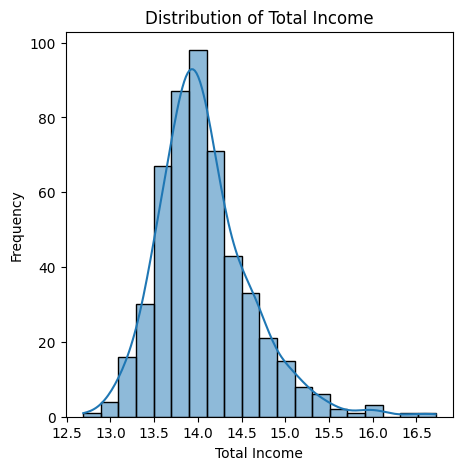

In [ ]:
# Plot histogram for TotalIncome
plt.figure(figsize=(5,5))
sns.histplot(df['TotalIncome'], bins=20, kde=True)
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the StandardScaler
standardized_data = scaler.fit_transform(x)

# Convert the standardized data back to a DataFrame (optional)
standardized_df = pd.DataFrame(standardized_data, columns=x.columns)



## Feature Selection

### Univariate Selection - SelectKBest()

In [ ]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k='all')
selector.fit_transform(one_hot_encoded, y)

# Get columns to keep and create a new DataFrame with those only
cols = selector.get_support(indices=True)
select_features = one_hot_encoded.iloc[:, cols]

# Print features with their scores
for feature, score in zip(select_features.columns, selector.scores_):
    print(f"Feature: {feature}, Score: {score}")


Feature: Gender_Male, Score: 0.05780668226067049
Feature: Married_Yes, Score: 1.4366782299191172
Feature: Dependents_1, Score: 2.0316940574103732
Feature: Dependents_2, Score: 5.298178434560471
Feature: Dependents_3+, Score: 0.9304169906970365
Feature: Education_Not Graduate, Score: 4.106635052788482
Feature: Self_Employed_Yes, Score: 0.0681597015732281
Feature: Property_Area_Semiurban, Score: 8.831199353648941
Feature: Property_Area_Urban, Score: 1.0277618872199263


In [ ]:
# Storing the newly selected dataframe with features having higher k values only
selected_char = one_hot_encoded.drop(["Gender_Male", "Self_Employed_Yes","Dependents_3+"], axis=1)

In [ ]:
#Select K_Best for numerica features
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you have your feature matrix X and target variable y
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit_transform(numerical_cols, y)

# Get columns to keep and create a new DataFrame with those only
cols = selector.get_support(indices=True)
select_features = numerical_cols.iloc[:, cols]

# Print features with their scores
for feature, score in zip(select_features.columns, selector.scores_):
    print(f"Feature: {feature}, Score: {score}")



Feature: LoanAmount, Score: 2.00597862568884
Feature: Loan_Amount_Term, Score: 1.334559739376807
Feature: Credit_History, Score: 191.24039187007773
Feature: TotalIncome, Score: 1.0542631777921905
Feature: Debt_to_Credit_ratio, Score: 0.7597208864478787


In [ ]:
# Storing the newly selected dataframe with features having higher k values only
selected_num = numerical_cols.drop(["Debt_to_Credit_ratio"], axis=1)

__Creating Master Feature Set for Testing the features selected on prototype model__

In [ ]:
X = pd.concat([selected_char,selected_num],axis=1,join="inner")

In [ ]:
# Reset the indices to ensure alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
# Convert 'y' to binary numeric values
y = pd.Series(pd.Categorical(y).codes)

In [ ]:
import statsmodels.api as sm

# Add a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Get the summary of results
summary = model.summary()

# Extract p-values from the summary
p_values = model.pvalues

# Print the summary and p-values
print(summary)
print("P-values:")
print(p_values)


Optimization terminated successfully.
         Current function value: 0.456222
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  508
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                           10
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                  0.2659
Time:                        04:54:51   Log-Likelihood:                -231.76
converged:                       True   LL-Null:                       -315.71
Covariance Type:            nonrobust   LLR p-value:                 7.562e-31
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4022      0.974     -1.440      0.150      -3.311   

#### Logistic Regression - Prototype model

In [ ]:
from sklearn.model_selection import train_test_split
#Let’s split X and y using Train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.8,random_state=100)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",Y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",Y_test.shape)

train size X :  (406, 11)
train size y :  (406,)
test size X :  (102, 11)
test size y :  (102,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
lr_basemodel = LogisticRegression()
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred_test = lr_basemodel.predict(X_test)
ConfusionMatrix = confusion_matrix(Y_test, y_pred_test)
print(ConfusionMatrix)

[[ 0 35]
 [ 0 67]]


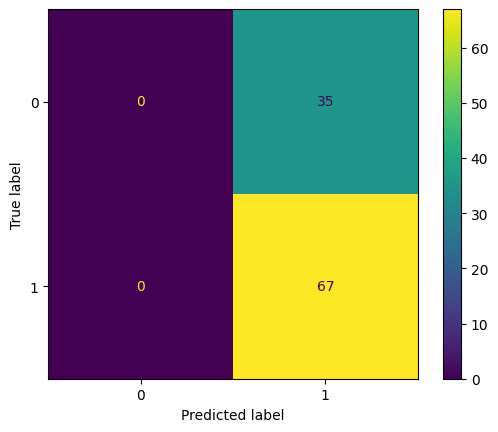

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

y_pred_test = lr_basemodel.predict(X_test)
print("f1 score for base model is:", f1_score(Y_test, y_pred_test, pos_label=1))


f1 score for base model is: 0.7928994082840237


In [ ]:
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_test))
#Precision score
print("precision score  test dataset:  t", precision_score(Y_test,y_pred_test, pos_label=1))
#Recall Score
print("Recall score  test dataset:  t", recall_score(Y_test,y_pred_test, pos_label=1))

Accuracy score  test dataset:  t 0.6568627450980392
precision score  test dataset:  t 0.6568627450980392
Recall score  test dataset:  t 1.0


### Feature Importance using Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(x, y)

# Get feature importance scores
feature_importance_scores = rf_model.feature_importances_

# Print feature importance scores
for feature, importance in zip(x.columns, feature_importance_scores):
    print(f"{feature}: {importance}")

# Select important features based on a threshold or top-k features
threshold = 0.1
important_features = x.columns[feature_importance_scores > threshold]

# Use the selected important_features for building the final model
X_reduced = x[important_features]


LoanAmount: 0.18390115449319466
Loan_Amount_Term: 0.03596032819433981
Credit_History: 0.2309476686904953
TotalIncome: 0.19579434843449983
Debt_to_Credit_ratio: 0.16089097411277517
Gender_Male: 0.020690557899981154
Married_Yes: 0.025137484532263405
Dependents_1: 0.020326708826770047
Dependents_2: 0.014355504651258883
Dependents_3+: 0.014346413619638374
Education_Not Graduate: 0.023027979696798435
Self_Employed_Yes: 0.019947456458862922
Property_Area_Semiurban: 0.030479686591103002
Property_Area_Urban: 0.024193733798018893


In [ ]:
X_reduced

,LoanAmount,Credit_History,TotalIncome,Debt_to_Credit_ratio
0,250000,1,1316025.0,0.19
1,256000,1,1370475.0,0.19
2,132000,1,675000.0,0.20
3,240000,1,1111725.0,0.22
4,282000,1,1350000.0,0.21
...,...,...,...,...
516,226000,1,824175.0,0.27
517,246000,0,1096650.0,0.22
518,370000,1,1484550.0,0.25
519,190000,1,765000.0,0.25


__Testing the selected features on Prototype model__

In [ ]:
# Reset the indices to ensure alignment
X_reduced.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
# Convert 'y' to binary numeric values
y = pd.Series(pd.Categorical(y).codes)

In [ ]:
import statsmodels.api as sm

# Add a constant term to the independent variables (required for statsmodels)
X_reduced = sm.add_constant(X_reduced)

# Fit the logistic regression model
model = sm.Logit(y, X_reduced).fit()

# Get the summary of results
summary = model.summary()

# Extract p-values from the summary
p_values = model.pvalues

# Print the summary and p-values
print(summary)
print("P-values:")
print(p_values)


Optimization terminated successfully.
         Current function value: 0.485361
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  508
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            4
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                  0.2190
Time:                        04:54:52   Log-Likelihood:                -246.56
converged:                       True   LL-Null:                       -315.71
Covariance Type:            nonrobust   LLR p-value:                 6.554e-29
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8051      0.559     -3.228      0.001      -2.901      -0.709

In [ ]:
from sklearn.model_selection import train_test_split
#Let’s split X and y using Train test split
X_train,X_test,Y_train,Y_test = train_test_split(X_reduced,y,train_size=0.8,random_state=42)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",Y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",Y_test.shape)

train size X :  (406, 5)
train size y :  (406,)
test size X :  (102, 5)
test size y :  (102,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
lr_basemodel =LogisticRegression()
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred_test = lr_basemodel.predict(X_test)
ConfusionMatrix = confusion_matrix(Y_test, y_pred_test)
print(ConfusionMatrix)

[[ 2 36]
 [ 2 62]]


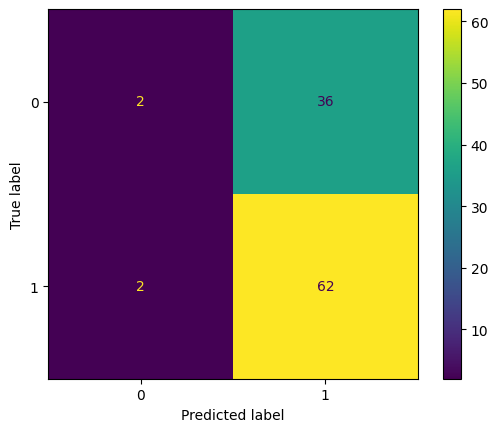

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

y_pred_test = lr_basemodel.predict(X_test)
print("f1 score for base model is:", f1_score(Y_test, y_pred_test, pos_label=1))


f1 score for base model is: 0.7654320987654322


In [ ]:
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_test))
#Precision score
print("precision score  test dataset:  t", precision_score(Y_test,y_pred_test, pos_label=1))
#Recall Score
print("Recall score  test dataset:  t", recall_score(Y_test,y_pred_test, pos_label=1))

Accuracy score  test dataset:  t 0.6274509803921569
precision score  test dataset:  t 0.6326530612244898
Recall score  test dataset:  t 0.96875


### RFE technique

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit (x,y)

print("Selected features: %s" % (fit.support_))
print("Features ranking: %s" % (fit.ranking_))

Selected features: [False False  True False  True False False  True  True False False False
  True False]
Features ranking: [ 8  7  1 10  1  6  2  1  1  4  9  5  1  3]


In [ ]:
# Select the data with only the selected features
selected_features_rfe = x.loc[:, fit.support_]

In [ ]:
# Reset the indices to ensure alignment
selected_features_rfe.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
# Convert 'y' to binary numeric values
y = pd.Series(pd.Categorical(y).codes)

In [ ]:
import statsmodels.api as sm

# Add a constant term to the independent variables (required for statsmodels)
X_reduced = sm.add_constant(selected_features_rfe)

# Fit the logistic regression model
model = sm.Logit(y,selected_features_rfe).fit()

# Get the summary of results
summary = model.summary()

# Extract p-values from the summary
p_values = model.pvalues

# Print the summary and p-values
print(summary)
print("P-values:")
print(p_values)


Optimization terminated successfully.
         Current function value: 0.491687
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  508
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            4
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                  0.2088
Time:                        04:54:52   Log-Likelihood:                -249.78
converged:                       True   LL-Null:                       -315.71
Covariance Type:            nonrobust   LLR p-value:                 1.555e-27
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Credit_History              2.4878      0.265      9.392      0.000       1.969   

*p-values < 0.05 means that features are significant for the target variable.*
*Whereas, p-values > 0.05 means that features are not impacting the target variable much.*

In [ ]:
from sklearn.model_selection import train_test_split
#Let’s split X and y using Train test split
X_train,X_test,Y_train,Y_test = train_test_split(selected_features_rfe,y,train_size=0.8,random_state=100)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",Y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",Y_test.shape)

train size X :  (406, 5)
train size y :  (406,)
test size X :  (102, 5)
test size y :  (102,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
lr_basemodel =LogisticRegression()
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred_test = lr_basemodel.predict(X_test)
ConfusionMatrix = confusion_matrix(Y_test, y_pred_test)
print(ConfusionMatrix)

[[14 21]
 [ 0 67]]


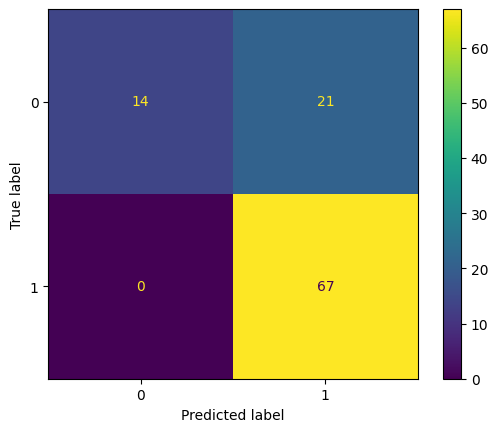

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

y_pred_test = lr_basemodel.predict(X_test)
print("f1 score for base model is:", f1_score(Y_test, y_pred_test, pos_label=1))

f1 score for base model is: 0.8645161290322582


In [ ]:
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_test))
#Precision score
print("precision score  test dataset:  t", precision_score(Y_test,y_pred_test, pos_label=1))
#Recall Score
print("Recall score  test dataset:  t", recall_score(Y_test,y_pred_test, pos_label=1))

Accuracy score  test dataset:  t 0.7941176470588235
precision score  test dataset:  t 0.7613636363636364
Recall score  test dataset:  t 1.0


### Conclusion:
 __RFE__ method selects the best features which gives maximum accuracy when tested with the base model.
 > So, the features selected for modelling according to p-values are:
  * Credit History
  * Debt to Credit ratio
  * Property_Area_Semiurban

In [ ]:
# Updating the dataframe x to contain only the selected features
x = x[['Credit_History','Debt_to_Credit_ratio','Property_Area_Semiurban']]

In [ ]:
from sklearn.model_selection import train_test_split
#Let’s split X and y using Train test split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.8,random_state=42)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",Y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",Y_test.shape)

train size X :  (406, 3)
train size y :  (406,)
test size X :  (102, 3)
test size y :  (102,)


In [ ]:
Y_train.value_counts()

1    285
0    121
dtype: int64

Not treating as imbalanced data as this is the general nature of a loan approval data.

## Classification Modelling

#### Logistic Regression

In [ ]:
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, auc, classification_report
from sklearn.metrics import roc_curve
from warnings import simplefilter
import statsmodels.api as sm
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
lr_basemodel =LogisticRegression()
lr_basemodel.fit(X_train,Y_train)

LogisticRegression()

[[17 21]
 [ 0 64]]


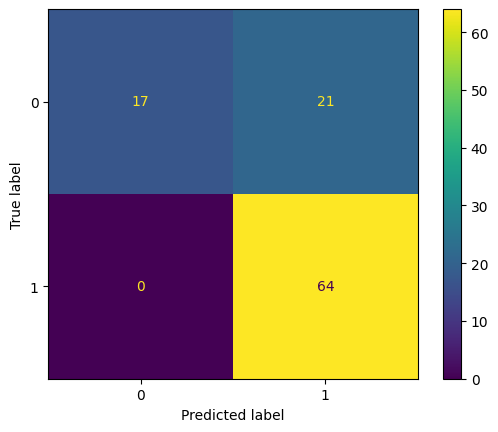

In [ ]:
y_pred_test = lr_basemodel.predict(X_test)
ConfusionMatrix = confusion_matrix(Y_test, y_pred_test)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

#Change it from column to rows

In [ ]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        38
           1       0.75      1.00      0.86        64

    accuracy                           0.79       102
   macro avg       0.88      0.72      0.74       102
weighted avg       0.84      0.79      0.77       102



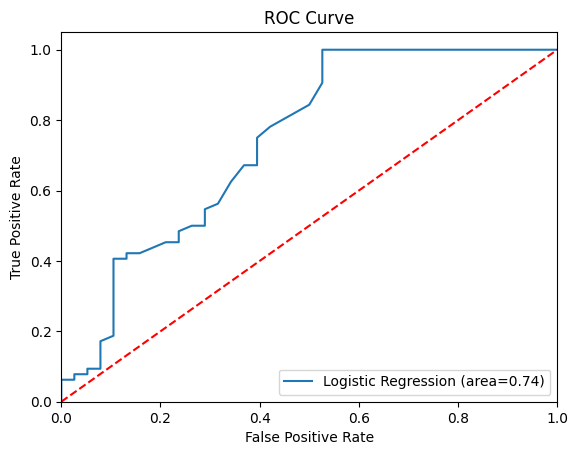

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, lr_basemodel.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

[[18 20]
 [ 0 64]]


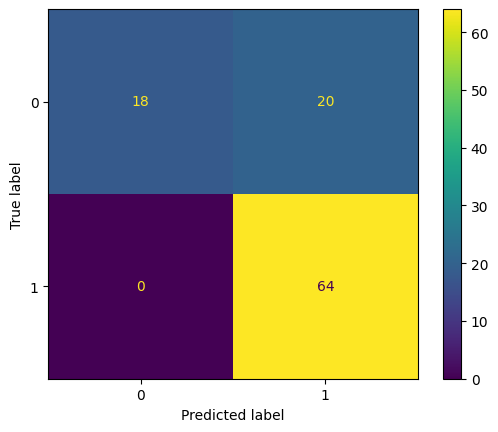

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.76      1.00      0.86        64

    accuracy                           0.80       102
   macro avg       0.88      0.74      0.75       102
weighted avg       0.85      0.80      0.78       102



Text(0, 0.5, 'Mean Error')

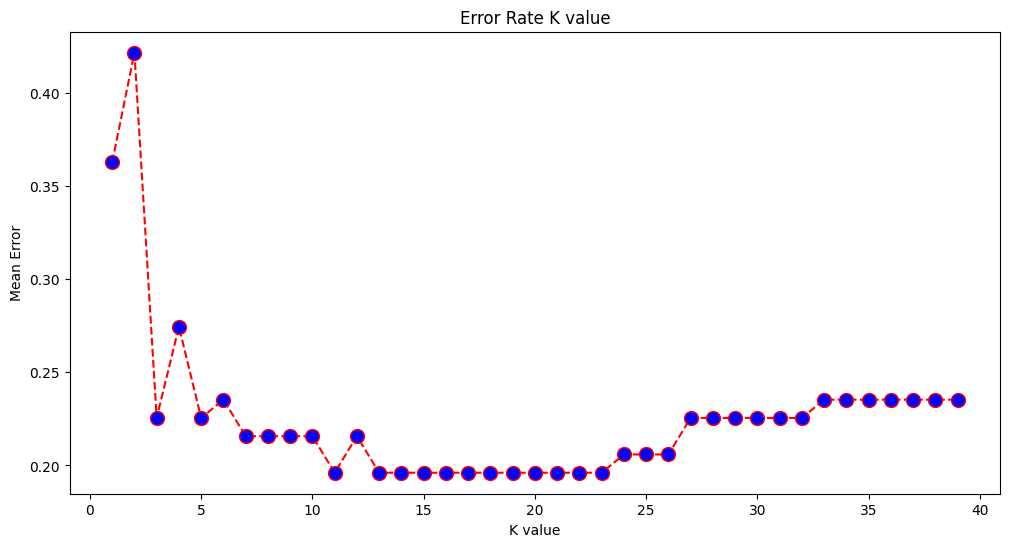

In [ ]:
error = []
#Calculating error for K values between 1 to 40
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

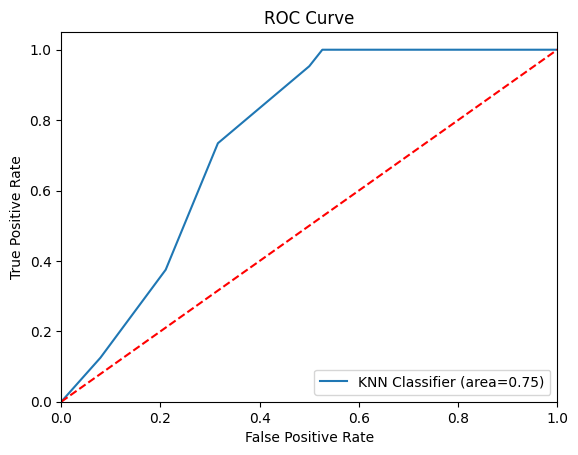

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='KNN Classifier (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
y_pred_rf = clf.predict(X_test)

[[21 17]
 [ 3 61]]


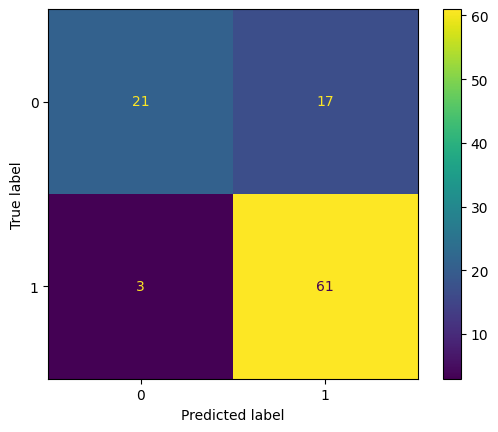

In [ ]:
ConfusionMatrix = confusion_matrix(Y_test, y_pred_rf)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           1       0.78      0.95      0.86        64

    accuracy                           0.80       102
   macro avg       0.83      0.75      0.77       102
weighted avg       0.82      0.80      0.79       102



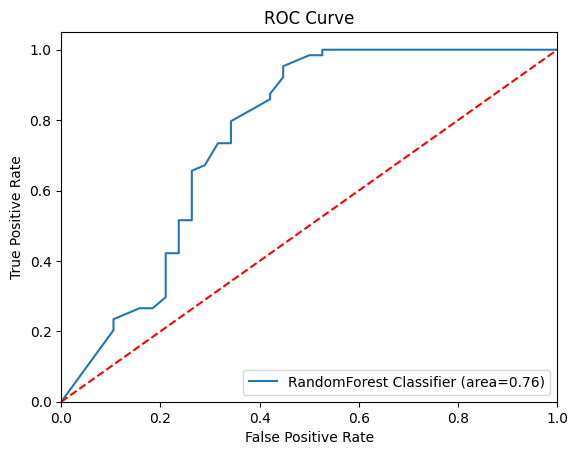

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='RandomForest Classifier (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_model = XGBClassifier(
    learning_rate=0.1,  # Learning rate (default is 0.3)
    n_estimators=100,   # Number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree
    random_state=42     # Random seed for reproducibility
)

# Train the model
xgb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


[[18 20]
 [ 0 64]]


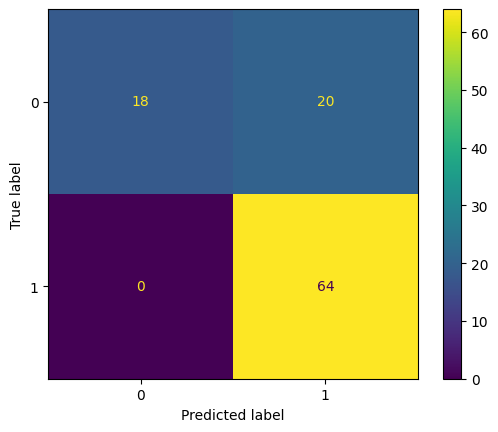

In [ ]:
ConfusionMatrix = confusion_matrix(Y_test, y_pred_xgb)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=xgb_model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.76      1.00      0.86        64

    accuracy                           0.80       102
   macro avg       0.88      0.74      0.75       102
weighted avg       0.85      0.80      0.78       102



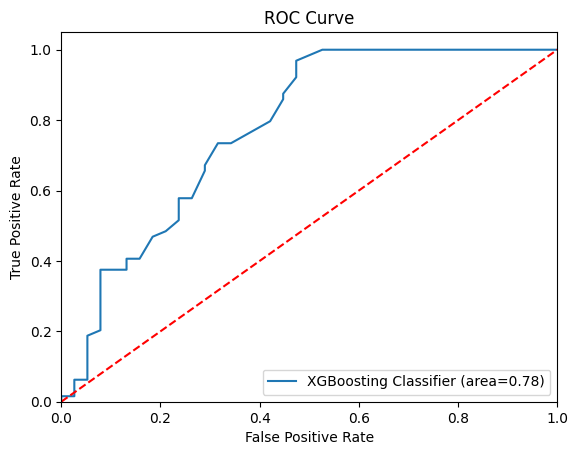

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, xgb_model.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='XGBoosting Classifier (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_NB = naive_bayes_model.predict(X_test)

In [ ]:
# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred_NB)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


[[18 20]
 [ 0 64]]


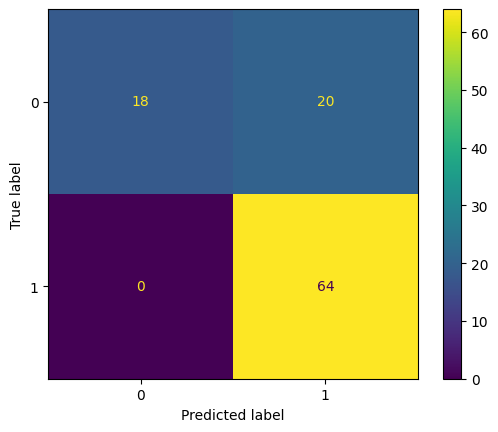

In [ ]:
ConfusionMatrix = confusion_matrix(Y_test, y_pred_NB)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=naive_bayes_model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.76      1.00      0.86        64

    accuracy                           0.80       102
   macro avg       0.88      0.74      0.75       102
weighted avg       0.85      0.80      0.78       102



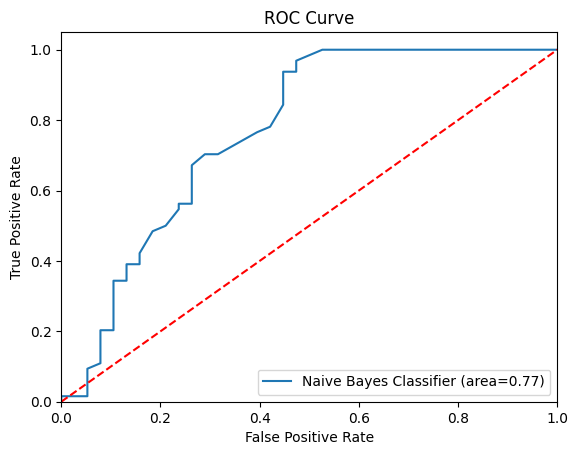

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, naive_bayes_model.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='Naive Bayes Classifier (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### SVM

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(random_state=101, probability=True)
# You can adjust the 'kernel' and 'C' parameters as needed

# Train the model
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred_svm)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.79


[[17 21]
 [ 0 64]]


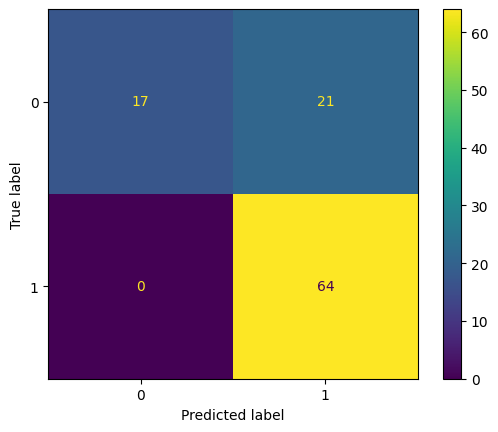

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred_svm)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        38
           1       0.75      1.00      0.86        64

    accuracy                           0.79       102
   macro avg       0.88      0.72      0.74       102
weighted avg       0.84      0.79      0.77       102



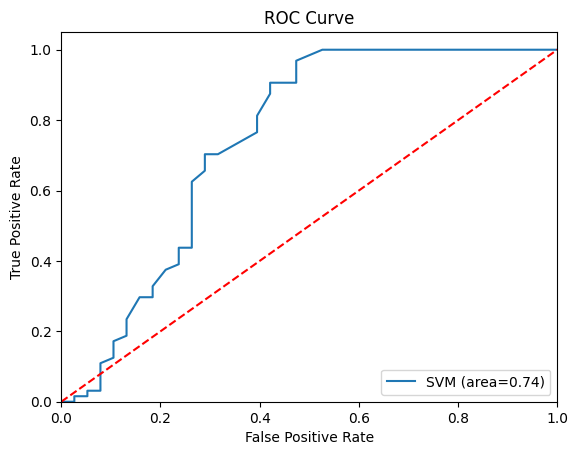

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, svm_model.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='SVM (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 23ms/step - loss: 0.6088 - accuracy: 0.7660 - val_loss: 0.5752 - val_accuracy: 0.7647
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.5324 - accuracy: 0.8030 - val_loss: 0.5283 - val_accuracy: 0.7941
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.4948 - accuracy: 0.8054 - val_loss: 0.5062 - val_accuracy: 0.7941
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.4741 - accuracy: 0.8054 - val_loss: 0.4980 - val_accuracy: 0.7941
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.8054 - val_loss: 0.4846 - val_accuracy: 0.8039
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.8054 - val_loss: 0.4894 - val_accuracy: 0.8039
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.4625 - accuracy: 0.8079 - val_loss: 0.4891 - val_accuracy: 0.8039
Epoch 8/20
13/13 [=

In [ ]:

print("Train score:", model.evaluate(x_train, Y_train))
print("Test score:", model.evaluate(x_test, Y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8153
Train score: [0.45024773478507996, 0.8152709603309631]
4/4 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8039
Test score: [0.4792487621307373, 0.8039215803146362]


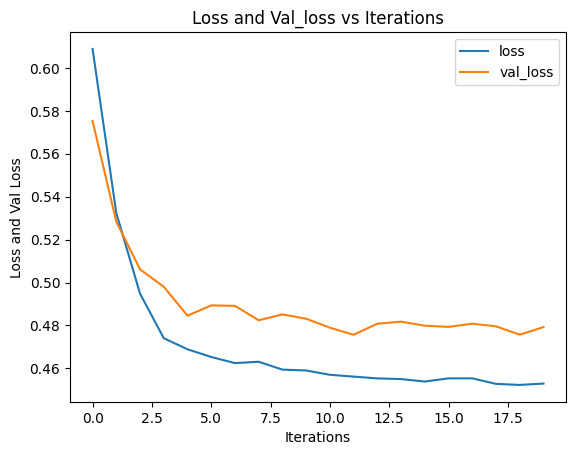

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations", loc='center')
plt.ylabel("Loss and Val Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [ ]:
# Make predictions
y_pred_NN = model.predict(x_test)
#print(y_pred)

4/4 [==============================] - 0s 2ms/step


In [ ]:
y_pred_NN = np.round(y_pred_NN).flatten()
y_pred_NN

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.],
      dtype=float32)

In [ ]:
print("Manually calculated accuracy:", np.mean(y_pred_NN == Y_test))
print("Evaluate output accuracy:", model.evaluate(x_test, Y_test))

Manually calculated accuracy: 0.803921568627451
4/4 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8039
Evaluate output accuracy: [0.4792487621307373, 0.8039215803146362]


[[18 20]
 [ 0 64]]


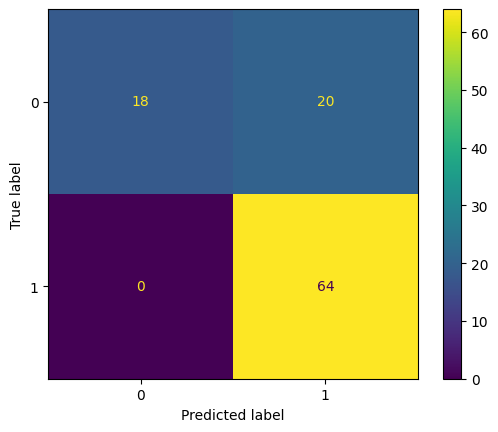

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred_NN)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_NN))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.76      1.00      0.86        64

    accuracy                           0.80       102
   macro avg       0.88      0.74      0.75       102
weighted avg       0.85      0.80      0.78       102



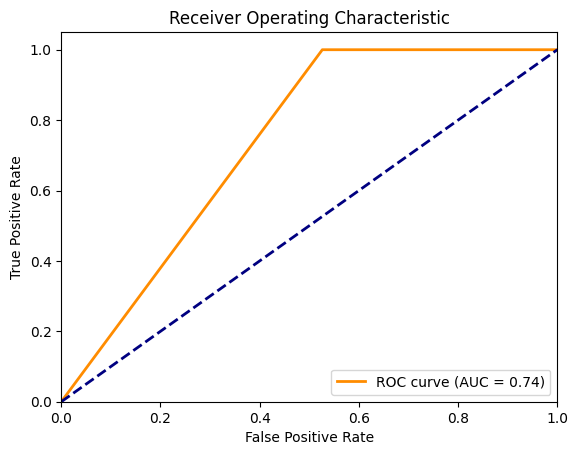

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_NN)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


 * __Observation__
 >> The XGBoost Classifier is performing best with the selected features. so, it will be our finalised model for the given classification model.


#### Hyperparameter tuning for improving the test results

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.01, 0.015, 0.020,0.025,0.05,0.1],
    'max_depth': [3, 5, 7,9,12,15,17,25],
    'min_child_weight': [1,3,5,7],
    'reg_alpha': [0,0.1,0.5,1.0],
    'reg_lambda': [0.01,0.03,0.05,0.07,0.09,0.1,1.0]
    }

xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.015, 0.02, 0.025, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
                         'min_child_weight': [1, 3, 5, 7],
                         'reg_alpha': [0, 0.1, 0.5, 1.0],
                         'reg_lambda': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1,
                                        1.0]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best paramaters are:", best_params)
print("Best score is : ", grid_search.best_score_)

Best paramaters are: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 0.01}
Best score is :  0.8178104575163397


#### Implementing the selected Model on test data

In [ ]:
xgb_final = XGBClassifier(**best_params)
xgb_final.fit(X_train, Y_train)
y_hat = xgb_final.predict(X_test)

[[18 20]
 [ 0 64]]


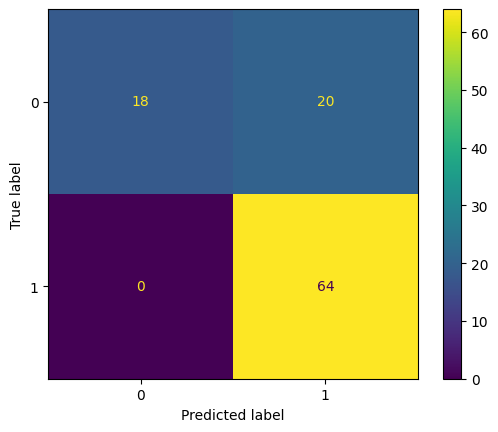

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_hat)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb_final.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.76      1.00      0.86        64

    accuracy                           0.80       102
   macro avg       0.88      0.74      0.75       102
weighted avg       0.85      0.80      0.78       102



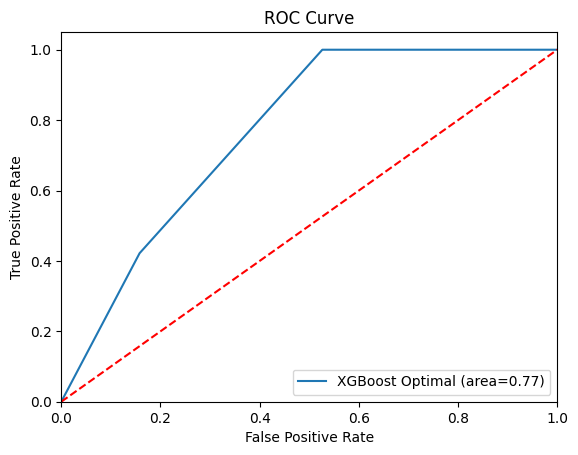

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, xgb_final.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='XGBoost Optimal (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()